In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import collections
import scipy
import os
import cv2 as cv
from os import listdir
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imread,imshow,imsave
from skimage.transform import resize
from skimage.filters import threshold_otsu,threshold_local


folder_mal = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/"

j = 1
path_out_mal = 'C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/'

for images1 in os.listdir(folder_mal): 
    if (images1.endswith('.png')):
        img = imread(folder_mal+images1)
        R,G,B=cv.split(img)
        #Parâmetros conforme artigo Jacques
        k = 2
        BIaimonino = np.invert(k*R-G-B)
        BI = BIaimonino
        binary_BIai  = BI > threshold_otsu(BI)
        ai = np.uint8(binary_BIai)
        img_bi = cv.bitwise_and(img, img, mask=ai)
        r,g,b=cv.split(img_bi)
        ai = g+r+b
        im_rgb = cv.cvtColor(ai, cv.COLOR_BGR2RGB)
        
        # pasta output
        prefixo = 'm'
        p = path_out_mal+prefixo+str(j).rjust(3,"0")+".png"
        # Salvando em PNG
        imsave(p, im_rgb)
        j = j + 1

In [21]:
folder_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Benignas_BBOBMO_PWBHEPL/"

j = 1
path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Benignas_BBOBMO_PWBHEPL/"

for images2 in os.listdir(folder_bem): 
    if (images2.endswith('.png')):
        img = imread(folder_bem+images2)
        R,G,B=cv.split(img)
        #Parâmetros conforme artigo Jacques
        k = 2
        BIaimonino = np.invert(k*R-G-B)
        BI = BIaimonino
        binary_BIai  = BI > threshold_otsu(BI)
        ai = np.uint8(binary_BIai)
        img_bi = cv.bitwise_and(img, img, mask=ai)
        r,g,b=cv.split(img_bi)
        ai = g+r+b
        im_rgb = cv.cvtColor(ai, cv.COLOR_BGR2RGB)
        
        # pasta output
        prefixo = 'b'
        p = path_out_bem+prefixo+str(j).rjust(3,"0")+".png"
        # Salvando em PNG
        imsave(p, im_rgb)
        j = j + 1

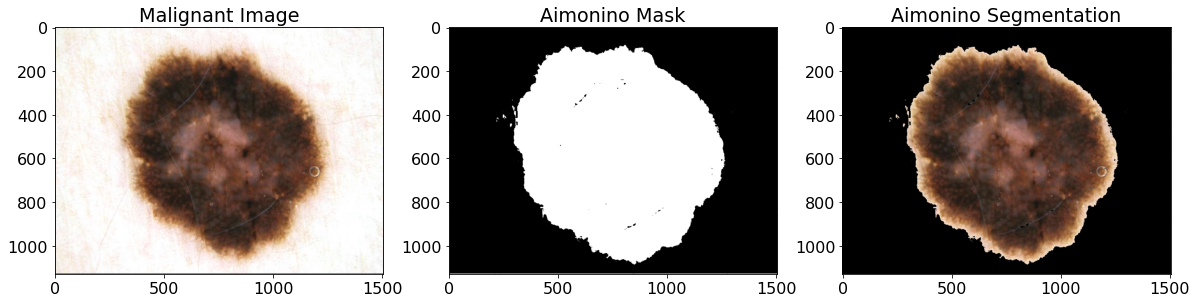

In [25]:
#--------------------------------Accuracy_BI_New_Image_Com Máscara_RGB-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local
from matplotlib import pyplot as plt
%matplotlib inline

#path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/"


img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/ISIC_0000029_BBOBMO.png')
#img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Benignas_BBOBMO_PWBHEPL/ISIC_0000000_BBOBMO.png')

#gt = imread ('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/Figures/ISIC_ground_truth_malignant.png')
#gt = imread ('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/Figures/ISIC_ground_truth_benign.png')

R,G,B=cv.split(img)
#Parâmetros conforme artigo Jacques
k = 1.7
BIaimonino = np.dot(k,R)-G-B
BI = BIaimonino
binary_BIai     = BI > threshold_otsu(BI)
ai = np.uint8(binary_BIai)
masked_ai = cv.bitwise_and(img, img, mask=ai)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 16})

plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Malignant Image')

plt.subplot(1, 3, 2), plt.imshow(binary_BIai, cmap=plt.cm.gray)
plt.title('Aimonino Mask')

plt.subplot(1, 3, 3), plt.imshow(masked_ai, cmap=plt.cm.gray)
plt.title('Aimonino Segmentation')

#plt.subplot(1, 3, 3), plt.imshow(gt, cmap=plt.cm.gray)
#plt.title('Ground Truth')

plt.show()

# pasta output
#prefixo = 'b'
#p = path_out_bem+prefixo+str(1).rjust(3,"0")+".png"
# Salvando em PNG
#imsave(p, np.uint8(out))

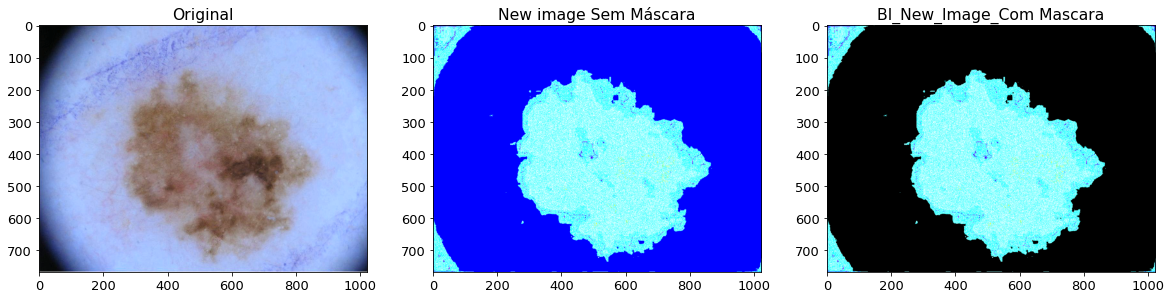

In [26]:
#--------------------------------Accuracy_BI_New_Image_Com Máscara-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local
from matplotlib import pyplot as plt
%matplotlib inline

#path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/"


img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/ISIC_0000002_BBOBMO.png')
R,G,B=cv.split(img)
#Parâmetros conforme artigo Jacques
k = 1.8
BIaimonino = np.dot(k,R)-G-B
BI = BIaimonino
binary_BIai     = BI > threshold_otsu(BI)
ai = np.uint8(binary_BIai)
masked_ai = cv.bitwise_and(img, img, mask=ai)

red,green,blue=cv.split(masked_ai)
L,a,b=cv.split(masked_ai)

BIaimonino = np.dot(k,red)-green-blue
BIlunadei2 = (red-blue)
BIfetuga = L - 100

new_img = (np.dstack((BIaimonino,BIlunadei2,BIfetuga)) * 255.999).astype(np.uint8)
out = cv.bitwise_and(new_img, new_img, mask=ai)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original')

plt.subplot(1, 3, 2), plt.imshow(new_img, cmap=plt.cm.gray)
plt.title('New image Sem Máscara')

plt.subplot(1, 3, 3), plt.imshow(out, cmap=plt.cm.gray)
plt.title('BI_New_Image_Com Mascara')

plt.show()

# pasta output
#prefixo = 'b'
#p = path_out_bem+prefixo+str(1).rjust(3,"0")+".png"
# Salvando em PNG
#imsave(p, np.uint8(out))

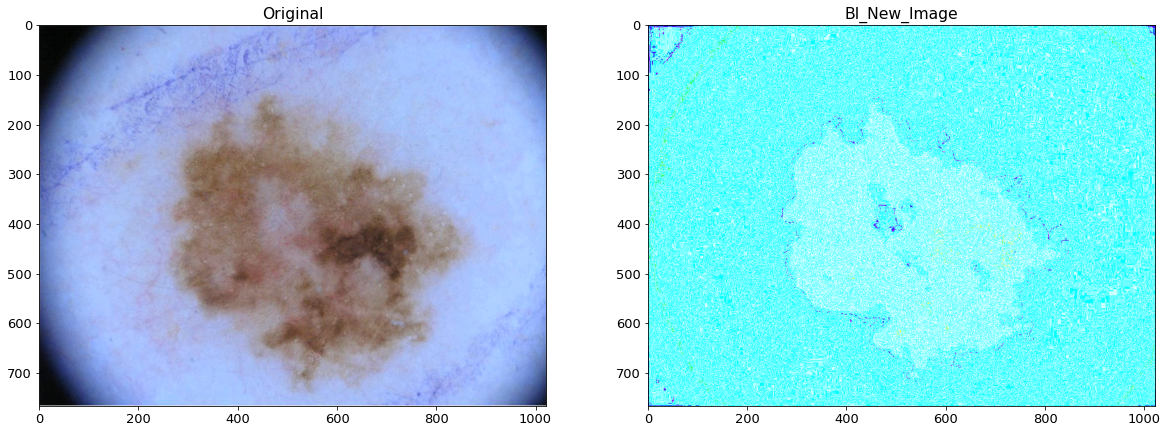

In [1]:
#--------------------------------Accuracy_BI_New_Image-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local
from matplotlib import pyplot as plt
%matplotlib inline

#path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/"


img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/ISIC_0000002_BBOBMO.png')
R,G,B=cv.split(img)
L,a,b=cv.split(img)
#Parâmetros conforme artigo Jacques
k = 1.8
BIaimonino = np.dot(k,R)-G-B
BIlunadei2 = R-B
BIfetuga = L - 100

new_img = (np.dstack((BIaimonino,BIlunadei2,BIfetuga)) * 255.999).astype(np.uint8)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Original')

plt.subplot(1, 2, 2), plt.imshow(new_img, cmap=plt.cm.gray)
plt.title('BI_New_Image')

plt.show()

# pasta output
#prefixo = 'b'
#p = path_out_bem+prefixo+str(1).rjust(3,"0")+".png"
# Salvando em PNG
#imsave(p, np.uint8(out))

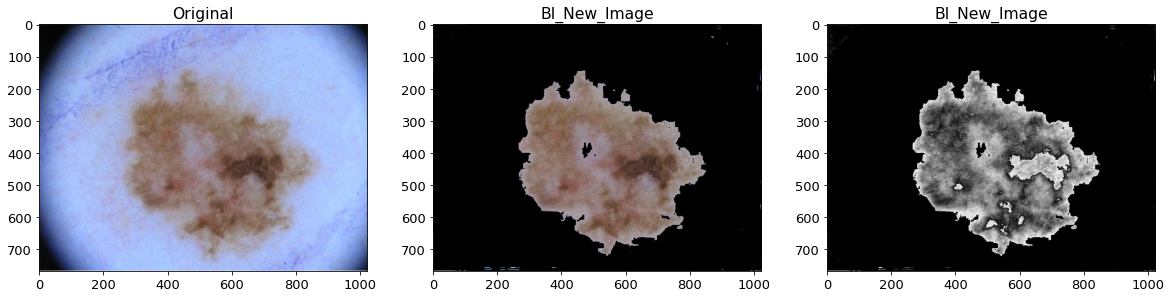

In [18]:
#--------------------------------Accuracy_BI_New_Image-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local
from matplotlib import pyplot as plt
%matplotlib inline

#path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/"


img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/ISIC_0000002_BBOBMO.png')
R,G,B=cv.split(img)
#Parâmetros conforme artigo Jacques
k = 2
BIaimonino = np.invert(k*R-G-B)
BI = BIaimonino
binary_BIai  = BI > threshold_otsu(BI)
ai = np.uint8(binary_BIai)
img_bi = cv.bitwise_and(img, img, mask=ai)
r,g,b=cv.split(img_bi)
ai = g+r+b
im_rgb = cv.cvtColor(ai, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original')
                       
plt.subplot(1, 3, 2), plt.imshow(img_bi)
plt.title('BI_New_Image')

plt.subplot(1, 3, 3), plt.imshow(im_rgb)
plt.title('BI_New_Image')

plt.show()

# pasta output
#prefixo = 'b'
#p = path_out_bem+prefixo+str(1).rjust(3,"0")+".png"
# Salvando em PNG
#imsave(p, np.uint8(out))